# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:04:52.160848: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:04:55.074554
2025-04-14 19:04:55.074554


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:04:50"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

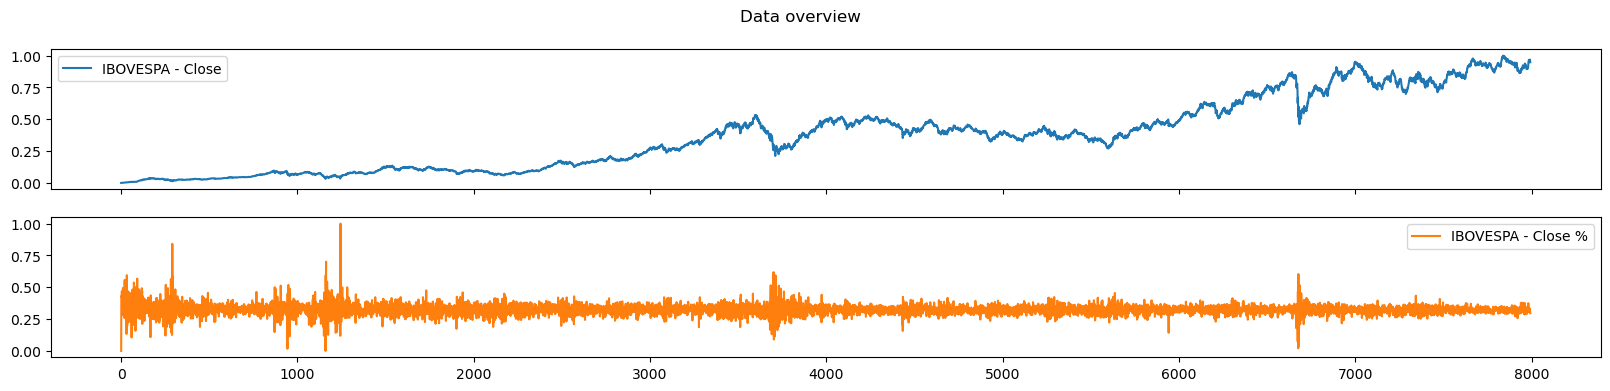

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

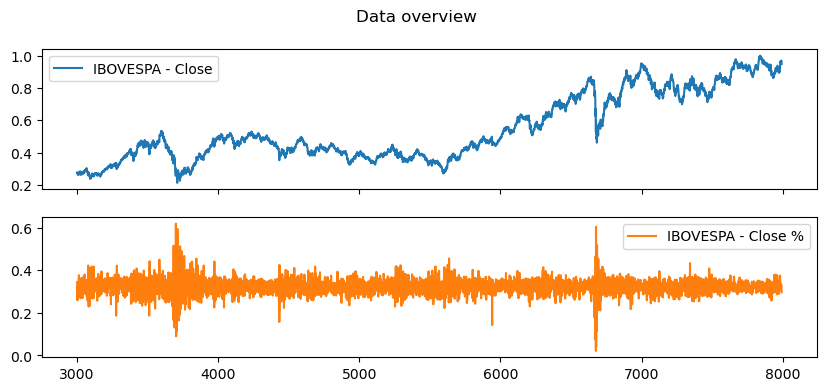

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

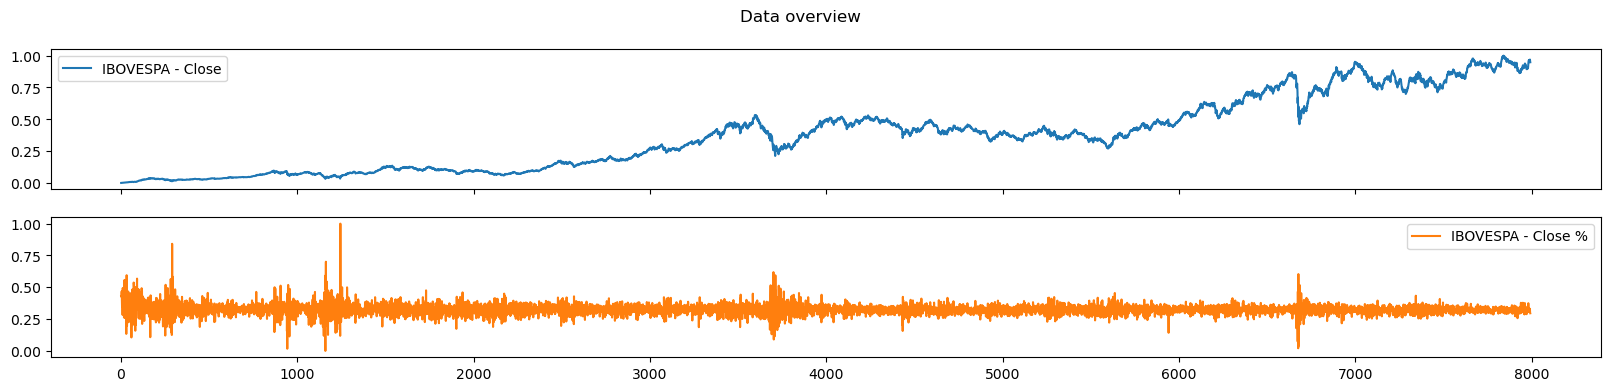

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

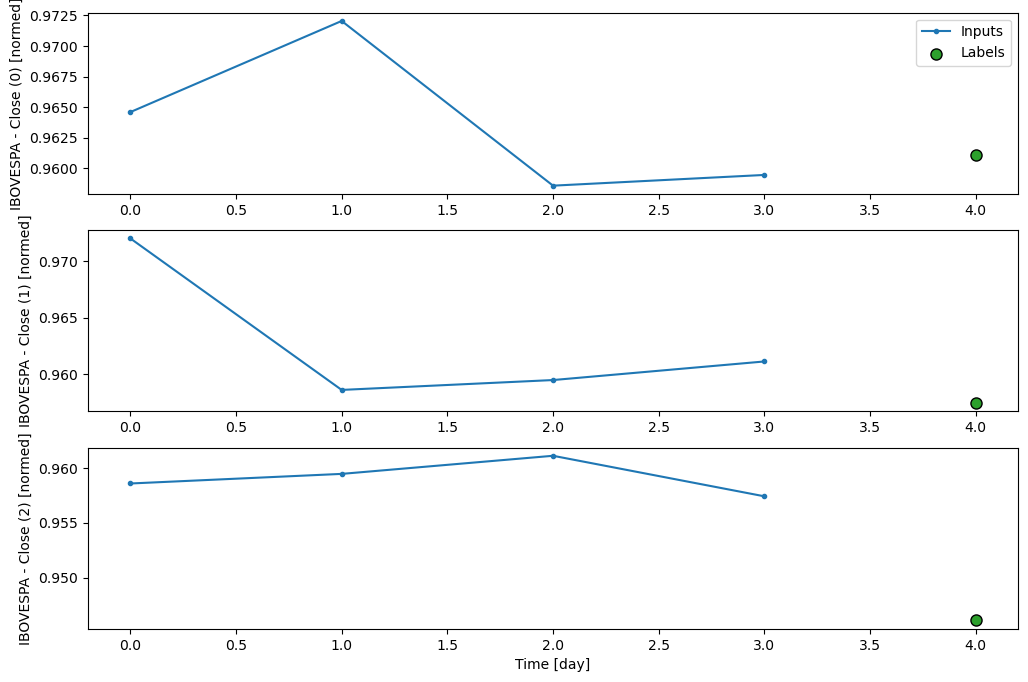

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

2

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:00 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 97.9564 - mean_squared_error: 2.0327e-04 - root_mean_squared_error: 0.0137  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 72.9386 - mean_squared_error: 1.7239e-04 - root_mean_squared_error: 0.0128

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 63.3302 - mean_squared_error: 1.7041e-04 - root_mean_squared_error: 0.0128

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 58.1654 - mean_squared_error: 1.7289e-04 - root_mean_squared_error: 0.0129

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.4425 - mean_squared_error: 1.8815e-04 - root_mean_squared_error: 0.0135

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.4348 - mean_squared_error: 2.0613e-04 - root_mean_squared_error: 0.0141

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.3307 - mean_squared_error: 2.2131e-04 - root_mean_squared_error: 0.0146

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 43.9678 - mean_squared_error: 2.4012e-04 - root_mean_squared_error: 0.0152

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 42.0190 - mean_squared_error: 2.6392e-04 - root_mean_squared_error: 0.0159

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 40.9399 - mean_squared_error: 2.7528e-04 - root_mean_squared_error: 0.0162

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 39.7814 - mean_squared_error: 2.9214e-04 - root_mean_squared_error: 0.0167

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 38.4802 - mean_squared_error: 3.4491e-04 - root_mean_squared_error: 0.0178

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 37.1112 - mean_squared_error: 4.3852e-04 - root_mean_squared_error: 0.0195

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 36.1305 - mean_squared_error: 6.6926e-04 - root_mean_squared_error: 0.0225

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 35.2669 - mean_squared_error: 9.0540e-04 - root_mean_squared_error: 0.0253

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 34.5502 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0276    

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 33.8892 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0297

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 33.4693 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0309

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 32.8629 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0325

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 32.2936 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 31.6485 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 31.1444 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 30.6706 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0381

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 30.1766 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0395

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 29.6530 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0410


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 29.5138 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0413 - val_loss: 0.0802 - val_mean_absolute_error: 0.0802 - val_mean_absolute_percentage_error: 8.5314 - val_mean_squared_error: 0.0075 - val_root_mean_squared_error: 0.0867


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.6940 - mean_absolute_error: 0.6940 - mean_absolute_percentage_error: 29970.6680 - mean_squared_error: 0.4817 - root_mean_squared_error: 0.6941

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6827 - mean_absolute_error: 0.6827 - mean_absolute_percentage_error: 14133.8477 - mean_squared_error: 0.4666 - root_mean_squared_error: 0.6829 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6420 - mean_absolute_error: 0.6420 - mean_absolute_percentage_error: 9839.8906 - mean_squared_error: 0.4191 - root_mean_squared_error: 0.6459 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5643 - mean_absolute_error: 0.5643 - mean_absolute_percentage_error: 7396.4858 - mean_squared_error: 0.3512 - root_mean_squared_error: 0.5866

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4970 - mean_absolute_error: 0.4970 - mean_absolute_percentage_error: 6008.3218 - mean_squared_error: 0.2999 - root_mean_squared_error: 0.5369

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4634 - mean_absolute_error: 0.4634 - mean_absolute_percentage_error: 5423.1416 - mean_squared_error: 0.2760 - root_mean_squared_error: 0.5121

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 4687.0752 - mean_squared_error: 0.2441 - root_mean_squared_error: 0.4775

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3758 - mean_absolute_error: 0.3758 - mean_absolute_percentage_error: 4097.0635 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4465

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 3687.6331 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4232

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 3360.0879 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.4033

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 3067.0762 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3845

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 2845.8706 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3696

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 2640.0342 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3552

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 2479.7195 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3437

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 2393.5010 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3374

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 2288.3655 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3295

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 2159.4500 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3197

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 2055.4146 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3114

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1961.8788 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.3038

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 1877.2866 - mean_squared_error: 0.1070 - root_mean_squared_error: 0.2968

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 1793.0812 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.2897

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 1716.8206 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2831

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 1647.3785 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2770

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 1583.8647 - mean_squared_error: 0.0915 - root_mean_squared_error: 0.2714

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 1551.4414 - mean_squared_error: 0.0898 - root_mean_squared_error: 0.2684


Epoch: 2 - LR: 0.009510851465165615


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1714 - mean_absolute_error: 0.1714 - mean_absolute_percentage_error: 1505.4666 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2643 - val_loss: 0.0775 - val_mean_absolute_error: 0.0775 - val_mean_absolute_percentage_error: 8.2616 - val_mean_squared_error: 0.0069 - val_root_mean_squared_error: 0.0830


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.5086 - mean_absolute_error: 0.5086 - mean_absolute_percentage_error: 21945.5938 - mean_squared_error: 0.2587 - root_mean_squared_error: 0.5086

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4949 - mean_absolute_error: 0.4949 - mean_absolute_percentage_error: 8811.4033 - mean_squared_error: 0.2453 - root_mean_squared_error: 0.4951  

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4611 - mean_absolute_error: 0.4611 - mean_absolute_percentage_error: 6079.7388 - mean_squared_error: 0.2173 - root_mean_squared_error: 0.4647

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4144 - mean_absolute_error: 0.4144 - mean_absolute_percentage_error: 4855.0430 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4304

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 4279.2529 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.4087

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 3628.7600 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3798

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 3130.3867 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3542

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 2904.2334 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3414

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 2637.8657 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3255

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 2420.7847 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.3116

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 2291.0325 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.3029

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 2207.4492 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2972

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 2115.6978 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2907

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 1967.7834 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2800

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 1820.0920 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2688

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1883 - mean_absolute_error: 0.1883 - mean_absolute_percentage_error: 1704.0118 - mean_squared_error: 0.0782 - root_mean_squared_error: 0.2597

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1795 - mean_absolute_error: 0.1795 - mean_absolute_percentage_error: 1603.2305 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2516

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1724 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 1521.7678 - mean_squared_error: 0.0705 - root_mean_squared_error: 0.2447

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1648 - mean_absolute_error: 0.1648 - mean_absolute_percentage_error: 1436.5546 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2374

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 1366.7496 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2313

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1529 - mean_absolute_error: 0.1529 - mean_absolute_percentage_error: 1304.0460 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2256

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 1242.9060 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2199

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 1191.8315 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2152


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 1148.9202 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2111 - val_loss: 0.0243 - val_mean_absolute_error: 0.0243 - val_mean_absolute_percentage_error: 2.5985 - val_mean_squared_error: 8.0788e-04 - val_root_mean_squared_error: 0.0284


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 12225.2539 - mean_squared_error: 0.0804 - root_mean_squared_error: 0.2835

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 4836.3418 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2614  

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 3225.8750 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2266

 33/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 2479.8799 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.2011

 45/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 2005.2417 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1811

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1384 - mean_absolute_error: 0.1384 - mean_absolute_percentage_error: 1739.9825 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1684

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 1525.4263 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1573

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 1389.0367 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1497

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 1277.2230 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1431

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 1164.9336 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1362

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 1088.0778 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1313

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 1001.4670 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1255

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 934.4359 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1209 

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 881.5412 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1171

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 852.8583 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1151

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 817.6699 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1124

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 781.7187 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1097

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 742.2338 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1067

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 716.1636 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1046

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 692.0336 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1027

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 672.3402 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1011

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 653.8425 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.0996

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 629.2772 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0975

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 606.6581 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0956

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 585.7556 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0938


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 570.1430 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0925 - val_loss: 0.0439 - val_mean_absolute_error: 0.0439 - val_mean_absolute_percentage_error: 4.6867 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0468


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 5809.1069 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1344

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 2108.8828 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1085 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 1502.3247 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0947

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 1248.4641 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0874

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 999.8169 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0789 

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 854.2448 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0733

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 749.4813 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0688

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 677.0460 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0654

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 618.6810 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0625

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 556.2809 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0592

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 502.7085 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 462.4761 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 426.2332 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 397.9426 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 373.5161 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 352.1891 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 331.9203 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 315.3689 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 299.3769 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 286.1245 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 273.1600 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 261.4345 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405 - val_loss: 0.0170 - val_mean_absolute_error: 0.0170 - val_mean_absolute_percentage_error: 1.8100 - val_mean_squared_error: 3.9056e-04 - val_root_mean_squared_error: 0.0198


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 4602.8672 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1065

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 1581.0022 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0822 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 1022.1315 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0676

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 776.0801 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0591 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 633.3044 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0533

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 544.8890 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 475.6035 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 423.4087 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 382.4891 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 351.7670 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 326.0531 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 304.1751 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 283.8548 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 267.5838 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 253.2442 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 239.5052 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 227.3132 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0312

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 216.4143 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 206.6112 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 199.0520 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320 - val_mean_absolute_percentage_error: 3.4201 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0343


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 5094.5513 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1179

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 1772.2653 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0948 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 1151.5118 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0789

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 876.0720 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0692 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 725.4460 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0628

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 622.9439 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 542.8959 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 486.8643 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 438.9783 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 400.4625 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 368.7594 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 344.0550 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 321.1049 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 301.2926 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 283.9977 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 268.7574 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 255.2138 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 243.9787 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 232.9745 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 225.2265 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 1.0304 - val_mean_squared_error: 1.3678e-04 - val_root_mean_squared_error: 0.0117


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 4394.6543 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1017

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 1518.3936 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0800 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 987.1853 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0668 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 751.0925 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0586

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 613.6938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0529

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 528.3979 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 461.5240 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 411.1625 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 368.9547 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 341.9510 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 317.0826 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 294.2997 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 276.2591 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 260.5006 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 245.5202 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 233.2825 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 221.4543 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 211.6492 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 202.7555 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 194.0053 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9379 - val_mean_squared_error: 1.1906e-04 - val_root_mean_squared_error: 0.0109


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 3680.9919 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0851

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 1257.1938 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 814.9968 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0535 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 630.9432 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 513.2818 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 435.8392 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 380.6271 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 339.0046 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 306.3542 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 281.8284 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 259.7295 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 242.4723 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 226.4196 - mean_squared_error: 9.6748e-04 - root_mean_squared_error: 0.0278

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 213.5489 - mean_squared_error: 9.1705e-04 - root_mean_squared_error: 0.0270

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 201.3091 - mean_squared_error: 8.6888e-04 - root_mean_squared_error: 0.0262

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 191.3082 - mean_squared_error: 8.2950e-04 - root_mean_squared_error: 0.0256

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 181.6391 - mean_squared_error: 7.9143e-04 - root_mean_squared_error: 0.0249

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 173.6226 - mean_squared_error: 7.6050e-04 - root_mean_squared_error: 0.0244

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 165.7764 - mean_squared_error: 7.3183e-04 - root_mean_squared_error: 0.0239


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 159.7253 - mean_squared_error: 7.1056e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0169 - val_mean_absolute_error: 0.0169 - val_mean_absolute_percentage_error: 1.7936 - val_mean_squared_error: 3.7543e-04 - val_root_mean_squared_error: 0.0194


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 3724.1787 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0861

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 1283.2590 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 826.9847 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0549 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 638.0428 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 517.6917 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 438.7178 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 382.4785 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 343.0432 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 316.4469 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 307.0486 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 296.1426 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 278.5387 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 259.9684 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 241.3111 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 225.4127 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 211.6694 - mean_squared_error: 9.9585e-04 - root_mean_squared_error: 0.0286

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 200.5261 - mean_squared_error: 9.6244e-04 - root_mean_squared_error: 0.0282

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 189.8256 - mean_squared_error: 9.2893e-04 - root_mean_squared_error: 0.0277

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 180.3112 - mean_squared_error: 8.9805e-04 - root_mean_squared_error: 0.0273

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 171.7910 - mean_squared_error: 8.6995e-04 - root_mean_squared_error: 0.0269

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 164.6759 - mean_squared_error: 8.4614e-04 - root_mean_squared_error: 0.0266


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 159.7522 - mean_squared_error: 8.2944e-04 - root_mean_squared_error: 0.0263 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0594 - val_mean_squared_error: 1.4969e-04 - val_root_mean_squared_error: 0.0122


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 1779.3201 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 586.3813 - mean_squared_error: 8.4278e-04 - root_mean_squared_error: 0.0283

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 378.7076 - mean_squared_error: 5.9189e-04 - root_mean_squared_error: 0.0234

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 293.1857 - mean_squared_error: 4.7773e-04 - root_mean_squared_error: 0.0208

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 245.8166 - mean_squared_error: 4.1235e-04 - root_mean_squared_error: 0.0192

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 207.9552 - mean_squared_error: 3.5745e-04 - root_mean_squared_error: 0.0177

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 181.2736 - mean_squared_error: 3.1784e-04 - root_mean_squared_error: 0.0166

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 161.3082 - mean_squared_error: 2.8760e-04 - root_mean_squared_error: 0.0157

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 146.7953 - mean_squared_error: 2.6556e-04 - root_mean_squared_error: 0.0151

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 134.9323 - mean_squared_error: 2.4789e-04 - root_mean_squared_error: 0.0145

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 124.2849 - mean_squared_error: 2.3311e-04 - root_mean_squared_error: 0.0141

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 116.0028 - mean_squared_error: 2.2284e-04 - root_mean_squared_error: 0.0138

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 108.8667 - mean_squared_error: 2.1417e-04 - root_mean_squared_error: 0.0136

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 102.1612 - mean_squared_error: 2.0580e-04 - root_mean_squared_error: 0.0133

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 96.3153 - mean_squared_error: 1.9832e-04 - root_mean_squared_error: 0.0131 

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 91.1708 - mean_squared_error: 1.9173e-04 - root_mean_squared_error: 0.0129

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 86.9382 - mean_squared_error: 1.8654e-04 - root_mean_squared_error: 0.0127

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 82.8223 - mean_squared_error: 1.8222e-04 - root_mean_squared_error: 0.0126

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 79.1203 - mean_squared_error: 1.7927e-04 - root_mean_squared_error: 0.0125


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 75.7709 - mean_squared_error: 1.7720e-04 - root_mean_squared_error: 0.0125 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8784 - val_mean_squared_error: 1.0007e-04 - val_root_mean_squared_error: 0.0100


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 3520.4604 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0814

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 1211.3986 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 781.1673 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0517 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 602.7448 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 489.1258 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 419.3812 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 364.9696 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 332.6595 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 296.7575 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 270.3141 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 248.6219 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 230.4823 - mean_squared_error: 9.4451e-04 - root_mean_squared_error: 0.0275

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 215.0461 - mean_squared_error: 8.9270e-04 - root_mean_squared_error: 0.0267

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 201.7292 - mean_squared_error: 8.4720e-04 - root_mean_squared_error: 0.0260

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 190.1112 - mean_squared_error: 8.0688e-04 - root_mean_squared_error: 0.0253

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 179.8769 - mean_squared_error: 7.7085e-04 - root_mean_squared_error: 0.0247

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 170.7852 - mean_squared_error: 7.3852e-04 - root_mean_squared_error: 0.0242

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 162.6504 - mean_squared_error: 7.0976e-04 - root_mean_squared_error: 0.0237

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 155.8621 - mean_squared_error: 6.8587e-04 - root_mean_squared_error: 0.0233


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 150.6644 - mean_squared_error: 6.6759e-04 - root_mean_squared_error: 0.0230 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1769 - val_mean_squared_error: 1.7366e-04 - val_root_mean_squared_error: 0.0132


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 1787.1544 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0413

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 589.7645 - mean_squared_error: 8.4964e-04 - root_mean_squared_error: 0.0283

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 387.8639 - mean_squared_error: 5.8999e-04 - root_mean_squared_error: 0.0231

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 314.5101 - mean_squared_error: 4.8882e-04 - root_mean_squared_error: 0.0208

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 254.3004 - mean_squared_error: 4.0311e-04 - root_mean_squared_error: 0.0187

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 212.5580 - mean_squared_error: 3.4237e-04 - root_mean_squared_error: 0.0171

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 183.7383 - mean_squared_error: 2.9995e-04 - root_mean_squared_error: 0.0159

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 162.5062 - mean_squared_error: 2.6837e-04 - root_mean_squared_error: 0.0149

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 147.2356 - mean_squared_error: 2.4556e-04 - root_mean_squared_error: 0.0142

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 133.9240 - mean_squared_error: 2.2588e-04 - root_mean_squared_error: 0.0136

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 123.0435 - mean_squared_error: 2.1064e-04 - root_mean_squared_error: 0.0131

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 114.6126 - mean_squared_error: 1.9946e-04 - root_mean_squared_error: 0.0127

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 106.8153 - mean_squared_error: 1.8928e-04 - root_mean_squared_error: 0.0124

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 100.5937 - mean_squared_error: 1.8116e-04 - root_mean_squared_error: 0.0122

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 95.1262 - mean_squared_error: 1.7395e-04 - root_mean_squared_error: 0.0119 

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 89.9015 - mean_squared_error: 1.6705e-04 - root_mean_squared_error: 0.0117

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 85.2762 - mean_squared_error: 1.6098e-04 - root_mean_squared_error: 0.0115

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 81.1497 - mean_squared_error: 1.5592e-04 - root_mean_squared_error: 0.0113

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 77.4481 - mean_squared_error: 1.5353e-04 - root_mean_squared_error: 0.0113

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 73.8648 - mean_squared_error: 1.5360e-04 - root_mean_squared_error: 0.0114


Epoch: 13 - LR: 0.007218156475573778


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 73.6233 - mean_squared_error: 1.5362e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2283 - val_mean_squared_error: 1.8811e-04 - val_root_mean_squared_error: 0.0137


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 2460.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 836.1124 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 543.4650 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 420.8965 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 342.6276 - mean_squared_error: 8.9311e-04 - root_mean_squared_error: 0.0282

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 294.3870 - mean_squared_error: 7.7889e-04 - root_mean_squared_error: 0.0261

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 261.7524 - mean_squared_error: 6.9962e-04 - root_mean_squared_error: 0.0245

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 234.2315 - mean_squared_error: 6.3161e-04 - root_mean_squared_error: 0.0231

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 212.4524 - mean_squared_error: 5.7716e-04 - root_mean_squared_error: 0.0220

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 193.4062 - mean_squared_error: 5.2931e-04 - root_mean_squared_error: 0.0209

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 177.8008 - mean_squared_error: 4.9074e-04 - root_mean_squared_error: 0.0201

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 164.7537 - mean_squared_error: 4.5875e-04 - root_mean_squared_error: 0.0193

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 153.6621 - mean_squared_error: 4.3150e-04 - root_mean_squared_error: 0.0187

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 144.1045 - mean_squared_error: 4.0789e-04 - root_mean_squared_error: 0.0181

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 136.3772 - mean_squared_error: 3.8870e-04 - root_mean_squared_error: 0.0177

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 129.5139 - mean_squared_error: 3.7162e-04 - root_mean_squared_error: 0.0173

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 123.3725 - mean_squared_error: 3.5633e-04 - root_mean_squared_error: 0.0169

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 117.4051 - mean_squared_error: 3.4171e-04 - root_mean_squared_error: 0.0165

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 112.0424 - mean_squared_error: 3.2906e-04 - root_mean_squared_error: 0.0162


Epoch: 14 - LR: 0.007039405405521393


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 106.8409 - mean_squared_error: 3.1707e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8343 - val_mean_squared_error: 9.5679e-05 - val_root_mean_squared_error: 0.0098


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 2641.6963 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0611

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 858.1600 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 565.3309 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 432.6043 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 354.5837 - mean_squared_error: 9.7034e-04 - root_mean_squared_error: 0.0292

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 302.5884 - mean_squared_error: 8.4092e-04 - root_mean_squared_error: 0.0269

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 267.6675 - mean_squared_error: 7.5189e-04 - root_mean_squared_error: 0.0253

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 238.7030 - mean_squared_error: 6.7695e-04 - root_mean_squared_error: 0.0238

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 217.5125 - mean_squared_error: 6.2158e-04 - root_mean_squared_error: 0.0227

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 198.8016 - mean_squared_error: 5.7276e-04 - root_mean_squared_error: 0.0217

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 184.4420 - mean_squared_error: 5.3588e-04 - root_mean_squared_error: 0.0209

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 171.2682 - mean_squared_error: 5.0218e-04 - root_mean_squared_error: 0.0202

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 160.8278 - mean_squared_error: 4.7546e-04 - root_mean_squared_error: 0.0196

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 150.9943 - mean_squared_error: 4.5008e-04 - root_mean_squared_error: 0.0190

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 143.6546 - mean_squared_error: 4.3106e-04 - root_mean_squared_error: 0.0186

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 136.4967 - mean_squared_error: 4.1246e-04 - root_mean_squared_error: 0.0182

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 130.0845 - mean_squared_error: 3.9582e-04 - root_mean_squared_error: 0.0178

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 123.8491 - mean_squared_error: 3.8025e-04 - root_mean_squared_error: 0.0174

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 118.6548 - mean_squared_error: 3.6875e-04 - root_mean_squared_error: 0.0172


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 113.5471 - mean_squared_error: 3.5827e-04 - root_mean_squared_error: 0.0169 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8009 - val_mean_squared_error: 8.7882e-05 - val_root_mean_squared_error: 0.0094


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 2568.7000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0594

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 877.6875 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 565.6053 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 428.8910 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 359.7617 - mean_squared_error: 9.6490e-04 - root_mean_squared_error: 0.0290

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 311.5432 - mean_squared_error: 8.4471e-04 - root_mean_squared_error: 0.0269

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 284.5916 - mean_squared_error: 7.7637e-04 - root_mean_squared_error: 0.0257

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 250.3327 - mean_squared_error: 6.8831e-04 - root_mean_squared_error: 0.0239

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 224.1122 - mean_squared_error: 6.2022e-04 - root_mean_squared_error: 0.0226

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 203.3393 - mean_squared_error: 5.6666e-04 - root_mean_squared_error: 0.0214

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 187.6247 - mean_squared_error: 5.2741e-04 - root_mean_squared_error: 0.0206

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 173.4024 - mean_squared_error: 4.9604e-04 - root_mean_squared_error: 0.0200

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 162.2482 - mean_squared_error: 4.7304e-04 - root_mean_squared_error: 0.0196

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 152.5748 - mean_squared_error: 4.5268e-04 - root_mean_squared_error: 0.0192

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 144.0961 - mean_squared_error: 4.3437e-04 - root_mean_squared_error: 0.0188

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 136.0122 - mean_squared_error: 4.1653e-04 - root_mean_squared_error: 0.0184

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 129.3899 - mean_squared_error: 4.0164e-04 - root_mean_squared_error: 0.0181

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 122.9740 - mean_squared_error: 3.8712e-04 - root_mean_squared_error: 0.0178

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 117.6453 - mean_squared_error: 3.7548e-04 - root_mean_squared_error: 0.0175

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 112.4188 - mean_squared_error: 3.6425e-04 - root_mean_squared_error: 0.0173


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 109.8120 - mean_squared_error: 3.5867e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6831 - val_mean_squared_error: 6.2155e-05 - val_root_mean_squared_error: 0.0079


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 1611.1365 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 509.4851 - mean_squared_error: 6.7271e-04 - root_mean_squared_error: 0.0251

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 339.5764 - mean_squared_error: 4.6594e-04 - root_mean_squared_error: 0.0204

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 260.6750 - mean_squared_error: 3.6477e-04 - root_mean_squared_error: 0.0178

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 211.1321 - mean_squared_error: 3.0025e-04 - root_mean_squared_error: 0.0159

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 178.8100 - mean_squared_error: 2.5748e-04 - root_mean_squared_error: 0.0146

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 155.9363 - mean_squared_error: 2.2708e-04 - root_mean_squared_error: 0.0136

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 138.7596 - mean_squared_error: 2.0408e-04 - root_mean_squared_error: 0.0129

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 125.3206 - mean_squared_error: 1.8611e-04 - root_mean_squared_error: 0.0122

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 114.4857 - mean_squared_error: 1.7203e-04 - root_mean_squared_error: 0.0117

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 105.5505 - mean_squared_error: 1.6114e-04 - root_mean_squared_error: 0.0114

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 98.0358 - mean_squared_error: 1.5215e-04 - root_mean_squared_error: 0.0110 

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 91.6181 - mean_squared_error: 1.4451e-04 - root_mean_squared_error: 0.0108

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 86.8716 - mean_squared_error: 1.3882e-04 - root_mean_squared_error: 0.0106

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 82.6405 - mean_squared_error: 1.3375e-04 - root_mean_squared_error: 0.0104

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 79.1720 - mean_squared_error: 1.2960e-04 - root_mean_squared_error: 0.0102

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 75.4125 - mean_squared_error: 1.2515e-04 - root_mean_squared_error: 0.0101

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 71.7616 - mean_squared_error: 1.2114e-04 - root_mean_squared_error: 0.0099

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 68.4833 - mean_squared_error: 1.1824e-04 - root_mean_squared_error: 0.0098

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 65.5211 - mean_squared_error: 1.1593e-04 - root_mean_squared_error: 0.0098


Epoch: 17 - LR: 0.006529277190566063


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 65.3053 - mean_squared_error: 1.1577e-04 - root_mean_squared_error: 0.0098 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9358 - val_mean_squared_error: 1.1925e-04 - val_root_mean_squared_error: 0.0109


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 2054.7092 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 660.5245 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 433.4506 - mean_squared_error: 8.2079e-04 - root_mean_squared_error: 0.0274

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 330.7326 - mean_squared_error: 6.4270e-04 - root_mean_squared_error: 0.0238

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 282.3577 - mean_squared_error: 5.5631e-04 - root_mean_squared_error: 0.0220

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 238.8465 - mean_squared_error: 4.7676e-04 - root_mean_squared_error: 0.0201

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 208.0920 - mean_squared_error: 4.1972e-04 - root_mean_squared_error: 0.0187

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 186.6042 - mean_squared_error: 3.7939e-04 - root_mean_squared_error: 0.0177

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 168.2662 - mean_squared_error: 3.4485e-04 - root_mean_squared_error: 0.0168

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 153.5293 - mean_squared_error: 3.1747e-04 - root_mean_squared_error: 0.0160

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 142.2620 - mean_squared_error: 2.9742e-04 - root_mean_squared_error: 0.0155

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 131.9601 - mean_squared_error: 2.7974e-04 - root_mean_squared_error: 0.0150

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 123.1892 - mean_squared_error: 2.6499e-04 - root_mean_squared_error: 0.0146

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 115.6186 - mean_squared_error: 2.5213e-04 - root_mean_squared_error: 0.0143

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 109.4902 - mean_squared_error: 2.4165e-04 - root_mean_squared_error: 0.0140

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 104.0426 - mean_squared_error: 2.3242e-04 - root_mean_squared_error: 0.0137

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 98.7816 - mean_squared_error: 2.2381e-04 - root_mean_squared_error: 0.0135 

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.4230 - mean_squared_error: 2.1719e-04 - root_mean_squared_error: 0.0133

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 90.4715 - mean_squared_error: 2.1189e-04 - root_mean_squared_error: 0.0131


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 86.5849 - mean_squared_error: 2.0696e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7261 - val_mean_squared_error: 6.9129e-05 - val_root_mean_squared_error: 0.0083


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 2268.2966 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 772.4816 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 503.1511 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 383.3467 - mean_squared_error: 9.2069e-04 - root_mean_squared_error: 0.0290

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 313.4678 - mean_squared_error: 7.7179e-04 - root_mean_squared_error: 0.0263

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 270.0654 - mean_squared_error: 6.7538e-04 - root_mean_squared_error: 0.0244

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 235.9627 - mean_squared_error: 5.9749e-04 - root_mean_squared_error: 0.0227

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 210.2267 - mean_squared_error: 5.3751e-04 - root_mean_squared_error: 0.0214

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 190.0328 - mean_squared_error: 4.8988e-04 - root_mean_squared_error: 0.0203

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 173.7183 - mean_squared_error: 4.5147e-04 - root_mean_squared_error: 0.0194

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 160.2384 - mean_squared_error: 4.2021e-04 - root_mean_squared_error: 0.0186

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 149.6959 - mean_squared_error: 3.9572e-04 - root_mean_squared_error: 0.0180

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 139.8777 - mean_squared_error: 3.7283e-04 - root_mean_squared_error: 0.0174

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 131.3847 - mean_squared_error: 3.5290e-04 - root_mean_squared_error: 0.0169

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 123.9589 - mean_squared_error: 3.3542e-04 - root_mean_squared_error: 0.0165

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 117.4055 - mean_squared_error: 3.1998e-04 - root_mean_squared_error: 0.0160

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 111.5742 - mean_squared_error: 3.0635e-04 - root_mean_squared_error: 0.0157

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 106.3510 - mean_squared_error: 2.9511e-04 - root_mean_squared_error: 0.0154

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 101.6432 - mean_squared_error: 2.8594e-04 - root_mean_squared_error: 0.0152


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 99.2951 - mean_squared_error: 2.8152e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8417 - val_mean_squared_error: 8.8958e-05 - val_root_mean_squared_error: 0.0094


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 1883.1096 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 636.9676 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 410.0772 - mean_squared_error: 7.2507e-04 - root_mean_squared_error: 0.0258

 33/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 348.8274 - mean_squared_error: 6.2706e-04 - root_mean_squared_error: 0.0237

 45/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 280.7717 - mean_squared_error: 5.1425e-04 - root_mean_squared_error: 0.0212

 57/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 236.9212 - mean_squared_error: 4.3959e-04 - root_mean_squared_error: 0.0194

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 205.9908 - mean_squared_error: 3.8585e-04 - root_mean_squared_error: 0.0180

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 182.8695 - mean_squared_error: 3.4503e-04 - root_mean_squared_error: 0.0169

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 163.5333 - mean_squared_error: 3.1063e-04 - root_mean_squared_error: 0.0159

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 149.3109 - mean_squared_error: 2.8547e-04 - root_mean_squared_error: 0.0152

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 136.7063 - mean_squared_error: 2.6400e-04 - root_mean_squared_error: 0.0146

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 127.0050 - mean_squared_error: 2.4846e-04 - root_mean_squared_error: 0.0141

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 118.0836 - mean_squared_error: 2.3475e-04 - root_mean_squared_error: 0.0137

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 110.9975 - mean_squared_error: 2.2394e-04 - root_mean_squared_error: 0.0134

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 104.3097 - mean_squared_error: 2.1358e-04 - root_mean_squared_error: 0.0131

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 99.7419 - mean_squared_error: 2.0643e-04 - root_mean_squared_error: 0.0129 

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 95.5960 - mean_squared_error: 1.9990e-04 - root_mean_squared_error: 0.0127

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 91.0969 - mean_squared_error: 1.9281e-04 - root_mean_squared_error: 0.0125

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 86.7228 - mean_squared_error: 1.8624e-04 - root_mean_squared_error: 0.0123

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 82.7898 - mean_squared_error: 1.8083e-04 - root_mean_squared_error: 0.0121


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 79.4946 - mean_squared_error: 1.7653e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7192 - val_mean_squared_error: 6.9751e-05 - val_root_mean_squared_error: 0.0084


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 1722.2686 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0400

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 580.7434 - mean_squared_error: 8.7386e-04 - root_mean_squared_error: 0.0290

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 378.5951 - mean_squared_error: 6.3589e-04 - root_mean_squared_error: 0.0244

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 288.6694 - mean_squared_error: 5.0850e-04 - root_mean_squared_error: 0.0216

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 239.6427 - mean_squared_error: 4.3389e-04 - root_mean_squared_error: 0.0198

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 203.8518 - mean_squared_error: 3.7666e-04 - root_mean_squared_error: 0.0183

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 178.3146 - mean_squared_error: 3.3464e-04 - root_mean_squared_error: 0.0171

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 159.0379 - mean_squared_error: 3.0222e-04 - root_mean_squared_error: 0.0161

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 144.9423 - mean_squared_error: 2.7822e-04 - root_mean_squared_error: 0.0154

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 132.5045 - mean_squared_error: 2.5731e-04 - root_mean_squared_error: 0.0148

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 122.2387 - mean_squared_error: 2.4080e-04 - root_mean_squared_error: 0.0142

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 113.5999 - mean_squared_error: 2.2712e-04 - root_mean_squared_error: 0.0138

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 106.7474 - mean_squared_error: 2.1630e-04 - root_mean_squared_error: 0.0135

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 100.2882 - mean_squared_error: 2.0598e-04 - root_mean_squared_error: 0.0131

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 95.0513 - mean_squared_error: 1.9761e-04 - root_mean_squared_error: 0.0129 

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 90.0222 - mean_squared_error: 1.8954e-04 - root_mean_squared_error: 0.0126

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 85.5498 - mean_squared_error: 1.8242e-04 - root_mean_squared_error: 0.0124

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 81.5463 - mean_squared_error: 1.7691e-04 - root_mean_squared_error: 0.0122

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 77.9416 - mean_squared_error: 1.7339e-04 - root_mean_squared_error: 0.0121


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.6483 - mean_squared_error: 1.7157e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7763 - val_mean_squared_error: 8.3028e-05 - val_root_mean_squared_error: 0.0091


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 1828.2690 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 648.8975 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316  

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 431.3463 - mean_squared_error: 7.3382e-04 - root_mean_squared_error: 0.0260

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 312.8308 - mean_squared_error: 5.5172e-04 - root_mean_squared_error: 0.0222

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 256.7003 - mean_squared_error: 4.6097e-04 - root_mean_squared_error: 0.0200

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 216.5883 - mean_squared_error: 3.9421e-04 - root_mean_squared_error: 0.0183

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 188.2977 - mean_squared_error: 3.4608e-04 - root_mean_squared_error: 0.0170

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 167.1484 - mean_squared_error: 3.0958e-04 - root_mean_squared_error: 0.0160

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 150.6761 - mean_squared_error: 2.8109e-04 - root_mean_squared_error: 0.0151

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 137.4494 - mean_squared_error: 2.5882e-04 - root_mean_squared_error: 0.0145

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 126.5781 - mean_squared_error: 2.4193e-04 - root_mean_squared_error: 0.0140

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 118.1160 - mean_squared_error: 2.2992e-04 - root_mean_squared_error: 0.0136

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 110.2597 - mean_squared_error: 2.1896e-04 - root_mean_squared_error: 0.0133

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 103.4792 - mean_squared_error: 2.0927e-04 - root_mean_squared_error: 0.0131

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 97.9906 - mean_squared_error: 2.0130e-04 - root_mean_squared_error: 0.0128 

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 92.7277 - mean_squared_error: 1.9354e-04 - root_mean_squared_error: 0.0126

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 88.0542 - mean_squared_error: 1.8664e-04 - root_mean_squared_error: 0.0124

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 83.8745 - mean_squared_error: 1.8089e-04 - root_mean_squared_error: 0.0122

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 80.6662 - mean_squared_error: 1.7680e-04 - root_mean_squared_error: 0.0121


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 77.4628 - mean_squared_error: 1.7283e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6590 - val_mean_squared_error: 5.6998e-05 - val_root_mean_squared_error: 0.0075


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 1253.9221 - mean_squared_error: 8.4836e-04 - root_mean_squared_error: 0.0291

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 399.0172 - mean_squared_error: 4.2512e-04 - root_mean_squared_error: 0.0202  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 271.0140 - mean_squared_error: 3.1675e-04 - root_mean_squared_error: 0.0172

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 206.7806 - mean_squared_error: 2.5555e-04 - root_mean_squared_error: 0.0153

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 171.8692 - mean_squared_error: 2.1998e-04 - root_mean_squared_error: 0.0141

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 146.3474 - mean_squared_error: 1.9226e-04 - root_mean_squared_error: 0.0131

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 129.3197 - mean_squared_error: 1.7301e-04 - root_mean_squared_error: 0.0124

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 115.2620 - mean_squared_error: 1.5680e-04 - root_mean_squared_error: 0.0117

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 104.2456 - mean_squared_error: 1.4397e-04 - root_mean_squared_error: 0.0112

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 95.9736 - mean_squared_error: 1.3458e-04 - root_mean_squared_error: 0.0108 

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 90.1271 - mean_squared_error: 1.2846e-04 - root_mean_squared_error: 0.0105

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 83.6183 - mean_squared_error: 1.2181e-04 - root_mean_squared_error: 0.0102

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 78.4750 - mean_squared_error: 1.1661e-04 - root_mean_squared_error: 0.0100

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 73.6431 - mean_squared_error: 1.1169e-04 - root_mean_squared_error: 0.0098

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 69.7360 - mean_squared_error: 1.0769e-04 - root_mean_squared_error: 0.0097

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 65.9941 - mean_squared_error: 1.0388e-04 - root_mean_squared_error: 0.0095

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.9164 - mean_squared_error: 1.0082e-04 - root_mean_squared_error: 0.0094

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 60.1433 - mean_squared_error: 9.8409e-05 - root_mean_squared_error: 0.0093

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 57.4337 - mean_squared_error: 9.7028e-05 - root_mean_squared_error: 0.0092

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 54.9840 - mean_squared_error: 9.6182e-05 - root_mean_squared_error: 0.0092


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 54.6280 - mean_squared_error: 9.6068e-05 - root_mean_squared_error: 0.0092 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6686 - val_mean_squared_error: 5.8042e-05 - val_root_mean_squared_error: 0.0076


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 1731.1284 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 584.4545 - mean_squared_error: 8.8414e-04 - root_mean_squared_error: 0.0291

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 376.7090 - mean_squared_error: 6.1042e-04 - root_mean_squared_error: 0.0237

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 285.6641 - mean_squared_error: 4.7733e-04 - root_mean_squared_error: 0.0206

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 233.1090 - mean_squared_error: 3.9705e-04 - root_mean_squared_error: 0.0186

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 198.3347 - mean_squared_error: 3.4239e-04 - root_mean_squared_error: 0.0171

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 173.4688 - mean_squared_error: 3.0261e-04 - root_mean_squared_error: 0.0159

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 155.9651 - mean_squared_error: 2.7430e-04 - root_mean_squared_error: 0.0151

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 140.9427 - mean_squared_error: 2.4987e-04 - root_mean_squared_error: 0.0143

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 129.6660 - mean_squared_error: 2.3182e-04 - root_mean_squared_error: 0.0137

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 119.5147 - mean_squared_error: 2.1629e-04 - root_mean_squared_error: 0.0132

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 110.9836 - mean_squared_error: 2.0351e-04 - root_mean_squared_error: 0.0128

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 103.7026 - mean_squared_error: 1.9271e-04 - root_mean_squared_error: 0.0125

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 97.8603 - mean_squared_error: 1.8399e-04 - root_mean_squared_error: 0.0122 

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 92.3015 - mean_squared_error: 1.7567e-04 - root_mean_squared_error: 0.0119

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 87.3999 - mean_squared_error: 1.6832e-04 - root_mean_squared_error: 0.0117

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 83.3595 - mean_squared_error: 1.6233e-04 - root_mean_squared_error: 0.0115

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 79.4252 - mean_squared_error: 1.5708e-04 - root_mean_squared_error: 0.0113

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 75.8824 - mean_squared_error: 1.5290e-04 - root_mean_squared_error: 0.0112


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 73.6286 - mean_squared_error: 1.5040e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6945 - val_mean_squared_error: 6.2788e-05 - val_root_mean_squared_error: 0.0079


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 1517.0386 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 511.8785 - mean_squared_error: 6.8170e-04 - root_mean_squared_error: 0.0256

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 333.6575 - mean_squared_error: 4.9614e-04 - root_mean_squared_error: 0.0216

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 254.4032 - mean_squared_error: 3.9685e-04 - root_mean_squared_error: 0.0191

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 208.2649 - mean_squared_error: 3.3423e-04 - root_mean_squared_error: 0.0173

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 177.5892 - mean_squared_error: 2.9061e-04 - root_mean_squared_error: 0.0160

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 155.5712 - mean_squared_error: 2.5832e-04 - root_mean_squared_error: 0.0150

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 140.0333 - mean_squared_error: 2.3512e-04 - root_mean_squared_error: 0.0142

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 126.6768 - mean_squared_error: 2.1501e-04 - root_mean_squared_error: 0.0135

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 116.6362 - mean_squared_error: 2.0014e-04 - root_mean_squared_error: 0.0130

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 108.2270 - mean_squared_error: 1.8829e-04 - root_mean_squared_error: 0.0126

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 101.0637 - mean_squared_error: 1.7825e-04 - root_mean_squared_error: 0.0122

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 94.4031 - mean_squared_error: 1.6893e-04 - root_mean_squared_error: 0.0119 

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 89.0638 - mean_squared_error: 1.6140e-04 - root_mean_squared_error: 0.0116

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 84.3554 - mean_squared_error: 1.5474e-04 - root_mean_squared_error: 0.0114

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 79.8413 - mean_squared_error: 1.4838e-04 - root_mean_squared_error: 0.0111

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 75.8328 - mean_squared_error: 1.4282e-04 - root_mean_squared_error: 0.0109

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 72.2486 - mean_squared_error: 1.3847e-04 - root_mean_squared_error: 0.0108

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 69.0246 - mean_squared_error: 1.3574e-04 - root_mean_squared_error: 0.0107


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 66.5382 - mean_squared_error: 1.3416e-04 - root_mean_squared_error: 0.0107 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6880 - val_mean_squared_error: 6.4294e-05 - val_root_mean_squared_error: 0.0080


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 1389.1042 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0323

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 471.9998 - mean_squared_error: 5.9274e-04 - root_mean_squared_error: 0.0240

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 310.0578 - mean_squared_error: 4.4875e-04 - root_mean_squared_error: 0.0207

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 238.0159 - mean_squared_error: 3.7098e-04 - root_mean_squared_error: 0.0187

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 195.7822 - mean_squared_error: 3.1915e-04 - root_mean_squared_error: 0.0172

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 167.5132 - mean_squared_error: 2.8152e-04 - root_mean_squared_error: 0.0161

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 147.0979 - mean_squared_error: 2.5270e-04 - root_mean_squared_error: 0.0151

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 131.5744 - mean_squared_error: 2.3001e-04 - root_mean_squared_error: 0.0143

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 120.1720 - mean_squared_error: 2.1310e-04 - root_mean_squared_error: 0.0137

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 110.0745 - mean_squared_error: 1.9850e-04 - root_mean_squared_error: 0.0132

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 101.7203 - mean_squared_error: 1.8761e-04 - root_mean_squared_error: 0.0128

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 95.1796 - mean_squared_error: 1.7982e-04 - root_mean_squared_error: 0.0126 

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 89.5155 - mean_squared_error: 1.7306e-04 - root_mean_squared_error: 0.0124

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 84.5554 - mean_squared_error: 1.6693e-04 - root_mean_squared_error: 0.0121

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 80.1725 - mean_squared_error: 1.6138e-04 - root_mean_squared_error: 0.0119

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 76.8892 - mean_squared_error: 1.5714e-04 - root_mean_squared_error: 0.0118

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 74.1802 - mean_squared_error: 1.5361e-04 - root_mean_squared_error: 0.0117

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 70.6227 - mean_squared_error: 1.4907e-04 - root_mean_squared_error: 0.0115

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 67.4270 - mean_squared_error: 1.4558e-04 - root_mean_squared_error: 0.0114

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 64.5378 - mean_squared_error: 1.4258e-04 - root_mean_squared_error: 0.0113


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 63.7040 - mean_squared_error: 1.4174e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6705 - val_mean_squared_error: 6.0957e-05 - val_root_mean_squared_error: 0.0078


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 1078.5703 - mean_squared_error: 6.3229e-04 - root_mean_squared_error: 0.0251

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 358.3845 - mean_squared_error: 3.2690e-04 - root_mean_squared_error: 0.0177  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 233.4380 - mean_squared_error: 2.3974e-04 - root_mean_squared_error: 0.0150

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 181.1994 - mean_squared_error: 1.9552e-04 - root_mean_squared_error: 0.0134

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 147.8721 - mean_squared_error: 1.6532e-04 - root_mean_squared_error: 0.0122

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 125.8875 - mean_squared_error: 1.4435e-04 - root_mean_squared_error: 0.0114

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 112.3078 - mean_squared_error: 1.3096e-04 - root_mean_squared_error: 0.0108

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 101.6649 - mean_squared_error: 1.2027e-04 - root_mean_squared_error: 0.0103

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 93.7761 - mean_squared_error: 1.1226e-04 - root_mean_squared_error: 0.0099 

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 85.9457 - mean_squared_error: 1.0438e-04 - root_mean_squared_error: 0.0095

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 79.4541 - mean_squared_error: 9.8449e-05 - root_mean_squared_error: 0.0092

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 73.5574 - mean_squared_error: 9.3504e-05 - root_mean_squared_error: 0.0090

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 68.9191 - mean_squared_error: 8.9726e-05 - root_mean_squared_error: 0.0088

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 64.5791 - mean_squared_error: 8.6246e-05 - root_mean_squared_error: 0.0087

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 60.8087 - mean_squared_error: 8.3191e-05 - root_mean_squared_error: 0.0085

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 57.5001 - mean_squared_error: 8.0520e-05 - root_mean_squared_error: 0.0084

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 54.5700 - mean_squared_error: 7.8184e-05 - root_mean_squared_error: 0.0083

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 51.9552 - mean_squared_error: 7.6332e-05 - root_mean_squared_error: 0.0082

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 50.1283 - mean_squared_error: 7.5678e-05 - root_mean_squared_error: 0.0082

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 48.1179 - mean_squared_error: 7.5332e-05 - root_mean_squared_error: 0.0082


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 47.0268 - mean_squared_error: 7.5226e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6872 - val_mean_squared_error: 6.0244e-05 - val_root_mean_squared_error: 0.0078


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 1490.7782 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 504.8775 - mean_squared_error: 6.6588e-04 - root_mean_squared_error: 0.0253

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 328.1154 - mean_squared_error: 4.7593e-04 - root_mean_squared_error: 0.0211

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 249.8439 - mean_squared_error: 3.7802e-04 - root_mean_squared_error: 0.0185

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 204.3426 - mean_squared_error: 3.1701e-04 - root_mean_squared_error: 0.0168

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 174.1344 - mean_squared_error: 2.7490e-04 - root_mean_squared_error: 0.0155

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 152.4674 - mean_squared_error: 2.4385e-04 - root_mean_squared_error: 0.0145

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 137.1877 - mean_squared_error: 2.2163e-04 - root_mean_squared_error: 0.0137

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 124.9695 - mean_squared_error: 2.0373e-04 - root_mean_squared_error: 0.0131

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 114.1955 - mean_squared_error: 1.8820e-04 - root_mean_squared_error: 0.0125

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 105.3105 - mean_squared_error: 1.7617e-04 - root_mean_squared_error: 0.0121

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 98.3697 - mean_squared_error: 1.6688e-04 - root_mean_squared_error: 0.0118 

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 91.9119 - mean_squared_error: 1.5829e-04 - root_mean_squared_error: 0.0115

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 86.7326 - mean_squared_error: 1.5136e-04 - root_mean_squared_error: 0.0112

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 81.8063 - mean_squared_error: 1.4476e-04 - root_mean_squared_error: 0.0110

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 77.7798 - mean_squared_error: 1.3937e-04 - root_mean_squared_error: 0.0108

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 73.8855 - mean_squared_error: 1.3423e-04 - root_mean_squared_error: 0.0106

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 70.6564 - mean_squared_error: 1.3039e-04 - root_mean_squared_error: 0.0104

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 67.4949 - mean_squared_error: 1.2719e-04 - root_mean_squared_error: 0.0103


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 65.0560 - mean_squared_error: 1.2497e-04 - root_mean_squared_error: 0.0103 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7638 - val_mean_squared_error: 7.3824e-05 - val_root_mean_squared_error: 0.0086


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 1376.9385 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 467.1739 - mean_squared_error: 5.7730e-04 - root_mean_squared_error: 0.0236

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 306.0157 - mean_squared_error: 4.2971e-04 - root_mean_squared_error: 0.0202

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 238.5713 - mean_squared_error: 3.5652e-04 - root_mean_squared_error: 0.0183

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 194.9960 - mean_squared_error: 3.0288e-04 - root_mean_squared_error: 0.0167

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 166.1010 - mean_squared_error: 2.6461e-04 - root_mean_squared_error: 0.0155

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 145.3856 - mean_squared_error: 2.3585e-04 - root_mean_squared_error: 0.0145

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 129.7199 - mean_squared_error: 2.1348e-04 - root_mean_squared_error: 0.0137

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 117.4057 - mean_squared_error: 1.9563e-04 - root_mean_squared_error: 0.0130

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 108.1420 - mean_squared_error: 1.8241e-04 - root_mean_squared_error: 0.0125

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 99.7893 - mean_squared_error: 1.7118e-04 - root_mean_squared_error: 0.0121 

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 92.7569 - mean_squared_error: 1.6179e-04 - root_mean_squared_error: 0.0118

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 86.7465 - mean_squared_error: 1.5382e-04 - root_mean_squared_error: 0.0115

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 81.9185 - mean_squared_error: 1.4736e-04 - root_mean_squared_error: 0.0112

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 77.3206 - mean_squared_error: 1.4120e-04 - root_mean_squared_error: 0.0110

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 73.2626 - mean_squared_error: 1.3575e-04 - root_mean_squared_error: 0.0108

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 70.1810 - mean_squared_error: 1.3168e-04 - root_mean_squared_error: 0.0106

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 67.3751 - mean_squared_error: 1.2833e-04 - root_mean_squared_error: 0.0105

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 64.5867 - mean_squared_error: 1.2552e-04 - root_mean_squared_error: 0.0104


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 61.8430 - mean_squared_error: 1.2311e-04 - root_mean_squared_error: 0.0103 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7810 - val_mean_squared_error: 7.7173e-05 - val_root_mean_squared_error: 0.0088


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 1313.3389 - mean_squared_error: 9.3557e-04 - root_mean_squared_error: 0.0306

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 445.5730 - mean_squared_error: 5.2516e-04 - root_mean_squared_error: 0.0225  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 290.8695 - mean_squared_error: 3.8446e-04 - root_mean_squared_error: 0.0190

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 222.1057 - mean_squared_error: 3.0943e-04 - root_mean_squared_error: 0.0169

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 181.9383 - mean_squared_error: 2.6129e-04 - root_mean_squared_error: 0.0154

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 155.1898 - mean_squared_error: 2.2748e-04 - root_mean_squared_error: 0.0142

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 135.9572 - mean_squared_error: 2.0229e-04 - root_mean_squared_error: 0.0133

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 122.3806 - mean_squared_error: 1.8416e-04 - root_mean_squared_error: 0.0126

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 110.7110 - mean_squared_error: 1.6850e-04 - root_mean_squared_error: 0.0120

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 101.9405 - mean_squared_error: 1.5704e-04 - root_mean_squared_error: 0.0115

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 94.0408 - mean_squared_error: 1.4762e-04 - root_mean_squared_error: 0.0112 

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 87.8703 - mean_squared_error: 1.4057e-04 - root_mean_squared_error: 0.0109

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 82.1282 - mean_squared_error: 1.3411e-04 - root_mean_squared_error: 0.0107

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.5209 - mean_squared_error: 1.2884e-04 - root_mean_squared_error: 0.0105

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.1374 - mean_squared_error: 1.2380e-04 - root_mean_squared_error: 0.0103

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 69.5535 - mean_squared_error: 1.1965e-04 - root_mean_squared_error: 0.0101

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 66.3394 - mean_squared_error: 1.1598e-04 - root_mean_squared_error: 0.0100

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 63.4398 - mean_squared_error: 1.1303e-04 - root_mean_squared_error: 0.0098

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 60.6019 - mean_squared_error: 1.1072e-04 - root_mean_squared_error: 0.0098


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 58.2228 - mean_squared_error: 1.0906e-04 - root_mean_squared_error: 0.0097 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7289 - val_mean_squared_error: 6.7430e-05 - val_root_mean_squared_error: 0.0082


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 1210.4042 - mean_squared_error: 7.9619e-04 - root_mean_squared_error: 0.0282

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 404.3238 - mean_squared_error: 4.1291e-04 - root_mean_squared_error: 0.0198  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 254.2549 - mean_squared_error: 2.8129e-04 - root_mean_squared_error: 0.0161

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 194.9454 - mean_squared_error: 2.2675e-04 - root_mean_squared_error: 0.0143

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 160.1129 - mean_squared_error: 1.9223e-04 - root_mean_squared_error: 0.0131

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 138.3191 - mean_squared_error: 1.6947e-04 - root_mean_squared_error: 0.0122

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 121.1155 - mean_squared_error: 1.5086e-04 - root_mean_squared_error: 0.0114

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 108.0966 - mean_squared_error: 1.3651e-04 - root_mean_squared_error: 0.0108

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 97.8578 - mean_squared_error: 1.2518e-04 - root_mean_squared_error: 0.0103 

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 90.1530 - mean_squared_error: 1.1706e-04 - root_mean_squared_error: 0.0099

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 83.2049 - mean_squared_error: 1.1046e-04 - root_mean_squared_error: 0.0097

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 77.3532 - mean_squared_error: 1.0503e-04 - root_mean_squared_error: 0.0094

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 72.3514 - mean_squared_error: 1.0050e-04 - root_mean_squared_error: 0.0092

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 68.3328 - mean_squared_error: 9.6826e-05 - root_mean_squared_error: 0.0091

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 64.5052 - mean_squared_error: 9.3328e-05 - root_mean_squared_error: 0.0089

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 61.8709 - mean_squared_error: 9.0933e-05 - root_mean_squared_error: 0.0088

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 59.0093 - mean_squared_error: 8.8391e-05 - root_mean_squared_error: 0.0087

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 56.4282 - mean_squared_error: 8.6466e-05 - root_mean_squared_error: 0.0086

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 53.9025 - mean_squared_error: 8.5120e-05 - root_mean_squared_error: 0.0086


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 51.7855 - mean_squared_error: 8.4275e-05 - root_mean_squared_error: 0.0086 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7432 - val_mean_squared_error: 7.0542e-05 - val_root_mean_squared_error: 0.0084


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 1257.2731 - mean_squared_error: 8.5838e-04 - root_mean_squared_error: 0.0293

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 426.0489 - mean_squared_error: 4.7795e-04 - root_mean_squared_error: 0.0215  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 276.5746 - mean_squared_error: 3.4185e-04 - root_mean_squared_error: 0.0179

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 213.9054 - mean_squared_error: 2.7407e-04 - root_mean_squared_error: 0.0158

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 173.9220 - mean_squared_error: 2.2807e-04 - root_mean_squared_error: 0.0142

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 149.3681 - mean_squared_error: 1.9897e-04 - root_mean_squared_error: 0.0132

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 131.4881 - mean_squared_error: 1.7727e-04 - root_mean_squared_error: 0.0123

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 117.8156 - mean_squared_error: 1.6044e-04 - root_mean_squared_error: 0.0117

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 106.9777 - mean_squared_error: 1.4707e-04 - root_mean_squared_error: 0.0111

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 98.1501 - mean_squared_error: 1.3636e-04 - root_mean_squared_error: 0.0107 

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 90.2557 - mean_squared_error: 1.2766e-04 - root_mean_squared_error: 0.0103

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 84.6042 - mean_squared_error: 1.2184e-04 - root_mean_squared_error: 0.0101

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 78.8631 - mean_squared_error: 1.1609e-04 - root_mean_squared_error: 0.0098

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 74.2818 - mean_squared_error: 1.1152e-04 - root_mean_squared_error: 0.0097

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 69.9421 - mean_squared_error: 1.0713e-04 - root_mean_squared_error: 0.0095

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 66.1315 - mean_squared_error: 1.0326e-04 - root_mean_squared_error: 0.0093

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 63.0012 - mean_squared_error: 1.0011e-04 - root_mean_squared_error: 0.0092

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 59.9617 - mean_squared_error: 9.7295e-05 - root_mean_squared_error: 0.0091

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 57.4325 - mean_squared_error: 9.5510e-05 - root_mean_squared_error: 0.0090

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 55.4997 - mean_squared_error: 9.4372e-05 - root_mean_squared_error: 0.0090


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 54.4085 - mean_squared_error: 9.3798e-05 - root_mean_squared_error: 0.0090 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7495 - val_mean_squared_error: 7.1722e-05 - val_root_mean_squared_error: 0.0085


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:40s:47ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 19:05:39.006657: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:04:50',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:40s:47ms',
 'TRAINING_EPOCHS': 32,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:05:39.232173: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 1184.9984 - mean_squared_error: 7.6368e-04 - root_mean_squared_error: 0.0276

 18/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 370.3278 - mean_squared_error: 6.9830e-04 - root_mean_squared_error: 0.0264  

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 253.5864 - mean_squared_error: 6.5769e-04 - root_mean_squared_error: 0.0256

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 200.2974 - mean_squared_error: 6.2224e-04 - root_mean_squared_error: 0.0249

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 175.8561 - mean_squared_error: 5.9908e-04 - root_mean_squared_error: 0.0244

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 155.5367 - mean_squared_error: 5.7786e-04 - root_mean_squared_error: 0.0240

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 141.0116 - mean_squared_error: 5.5832e-04 - root_mean_squared_error: 0.0236

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 130.0568 - mean_squared_error: 5.3994e-04 - root_mean_squared_error: 0.0231

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 118.3522 - mean_squared_error: 5.1770e-04 - root_mean_squared_error: 0.0226

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 109.8492 - mean_squared_error: 4.9981e-04 - root_mean_squared_error: 0.0222

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 102.1897 - mean_squared_error: 4.8229e-04 - root_mean_squared_error: 0.0218

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 95.2830 - mean_squared_error: 4.6521e-04 - root_mean_squared_error: 0.0214 

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 89.3671 - mean_squared_error: 4.4970e-04 - root_mean_squared_error: 0.0210

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 84.2336 - mean_squared_error: 4.3617e-04 - root_mean_squared_error: 0.0207

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 79.9808 - mean_squared_error: 4.2581e-04 - root_mean_squared_error: 0.0204

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 76.4152 - mean_squared_error: 4.1729e-04 - root_mean_squared_error: 0.0202


Loss: 0.015106179751455784 - MAE: 0.015106179751455784 - MSE: 0.00028935508453287184 - MAPE: 22.658937454223633 - RMSE: 0.017010441049933434


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 1.1818 - mean_squared_error: 1.4659e-04 - root_mean_squared_error: 0.0121

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 0.8199 - mean_squared_error: 8.3419e-05 - root_mean_squared_error: 0.0091 


Loss: 0.00685424730181694 - MAE: 0.00685424730181694 - MSE: 7.172170444391668e-05 - MAPE: 0.7494676113128662 - RMSE: 0.008468866348266602


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 0.4694 - mean_squared_error: 3.4214e-05 - root_mean_squared_error: 0.0058

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 0.7770 - mean_squared_error: 8.9547e-05 - root_mean_squared_error: 0.0093


Loss: 0.007908020168542862 - MAE: 0.007908020168542862 - MSE: 0.00010230256884824485 - MAPE: 0.8677984476089478 - RMSE: 0.010114473290741444


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

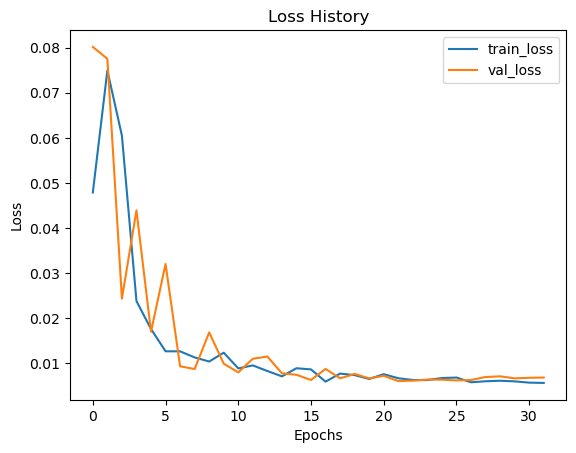

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

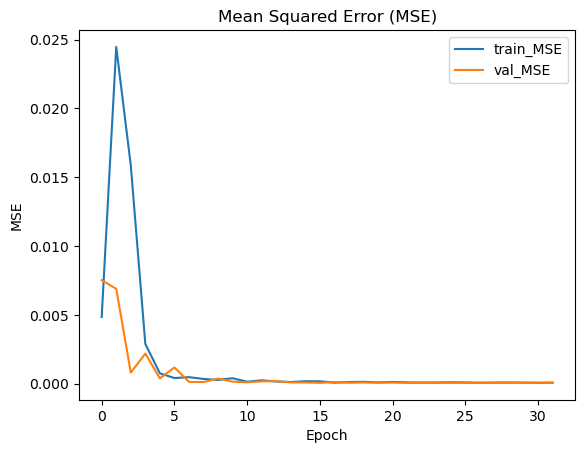

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

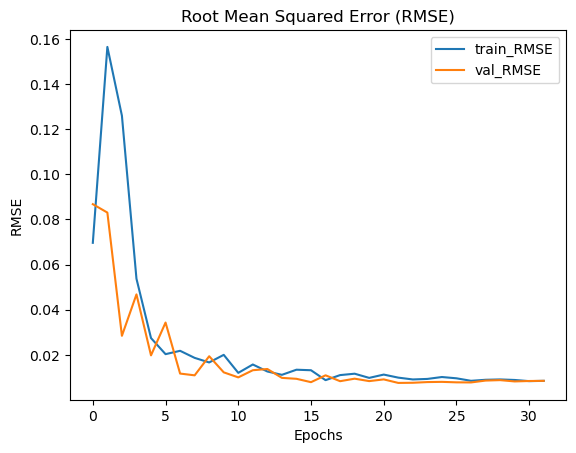

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

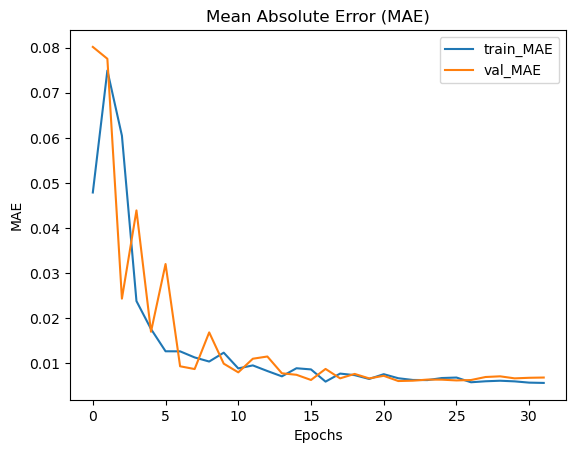

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

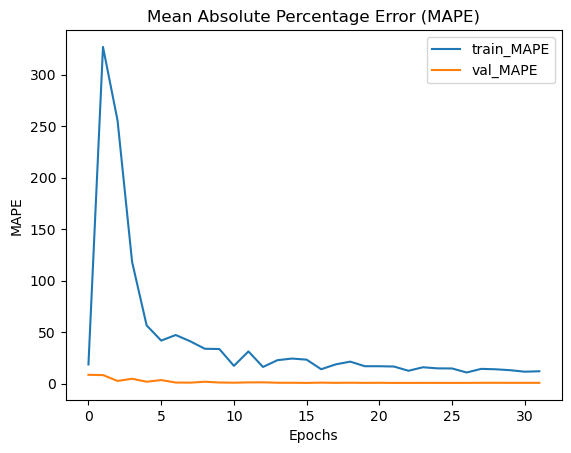

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:05:42.779942: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 2)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


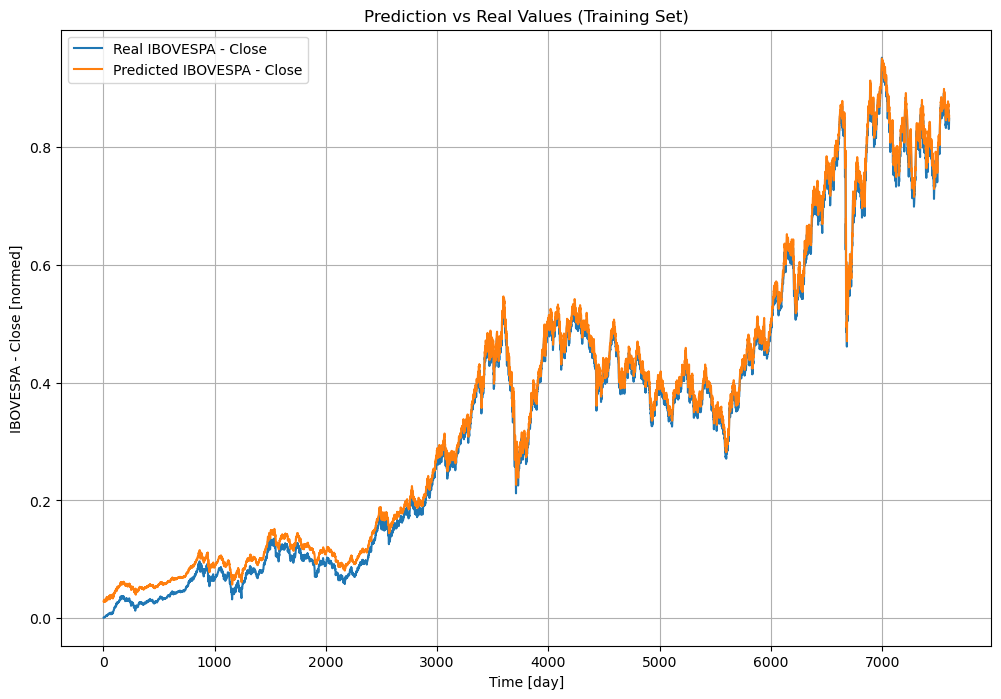

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


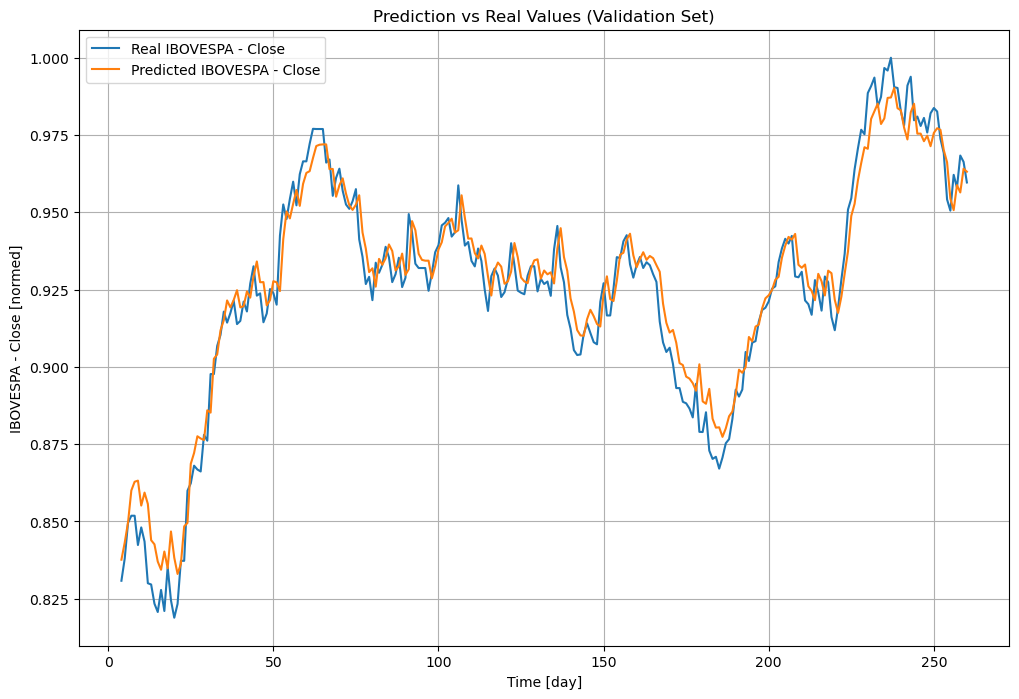

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


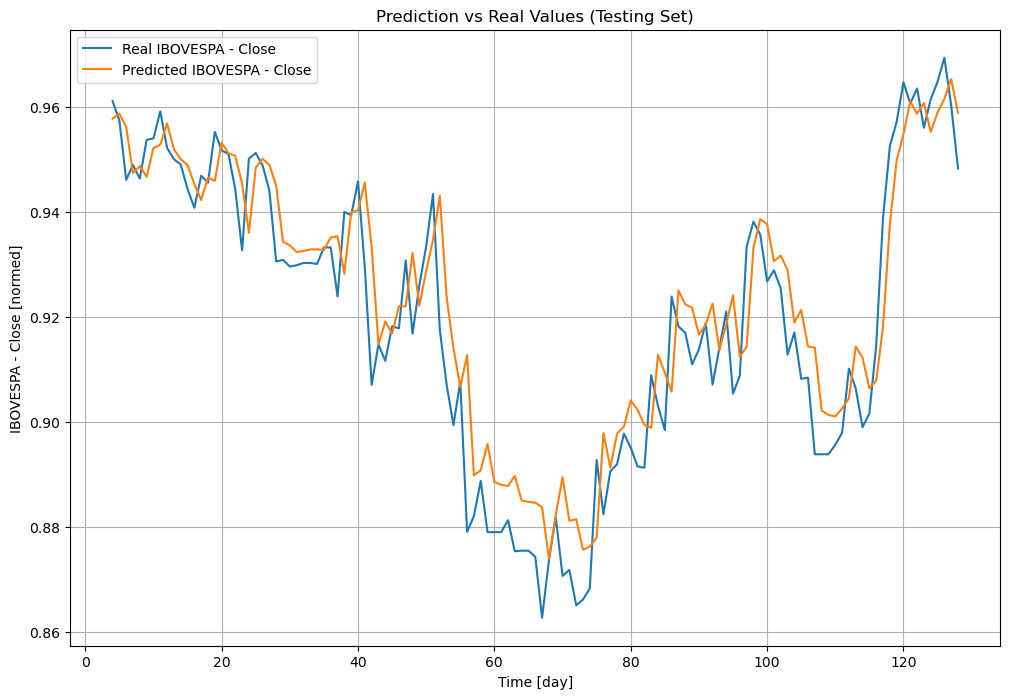

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

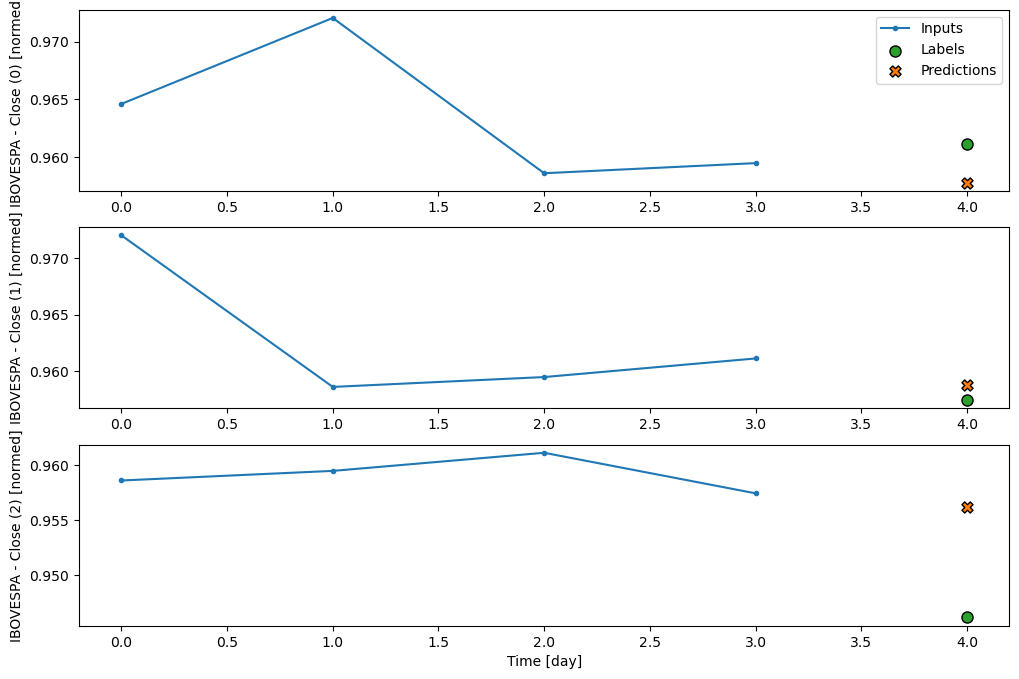

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:50s:191ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[[0.95777094, 0.95777094, 0.95777094, ..., 0.95777094,
         0.95777094, 0.95777094]],

       [[0.9587195 , 0.9587195 , 0.9587195 , ..., 0.9587195 ,
         0.9587195 , 0.9587195 ]],

       [[0.956161  , 0.956161  , 0.956161  , ..., 0.956161  ,
         0.956161  , 0.956161  ]],

       ...,

       [[0.9615253 , 0.9615253 , 0.9615253 , ..., 0.9615253 ,
         0.9615253 , 0.9615253 ]],

       [[0.9652921 , 0.9652921 , 0.9652921 , ..., 0.9652921 ,
         0.9652921 , 0.9652921 ]],

       [[0.95888627, 0.95888627, 0.95888627, ..., 0.95888627,
         0.95888627, 0.95888627]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')